#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:
The offset is shifting for TDL2 ???????

# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL3_Z3_2 = TDL_Class.TDL()
TDL3_Z3_2.initialize_TDL(6400,8000,2)

[6408 6409 6410 6411 6412 6413 6414 6415 6432 6433 6434 6435 6436 6437
 6438 6439 6456 6457 6458 6459 6460 6461 6462 6463 6480 6481 6482 6483
 6484 6485 6486 6487 6504 6505 6506 6507 6508 6509 6510 6511 6528 6529
 6530 6531 6532 6533 6534 6535 6552 6553 6554 6555 6556 6557 6558 6559
 6576 6577 6578 6579 6580 6581 6582 6583 6600 6601 6602 6603 6604 6605
 6606 6607 6624 6625 6626 6627 6628 6629 6630 6631 6648 6649 6650 6651
 6652 6653 6654 6655 6672 6673 6674 6675 6676 6677 6678 6679 6696 6697
 6698 6699 6700 6701 6702 6703 6720 6721 6722 6723 6724 6725 6726 6727
 6744 6745 6746 6747 6748 6749 6750 6751 6768 6769 6770 6771 6772 6773
 6774 6775 6792 6793 6794 6795 6796 6797 6798 6799 6816 6817 6818 6819
 6820 6821 6822 6823 6840 6841 6842 6843 6844 6845 6846 6847 6864 6865
 6866 6867 6868 6869 6870 6871 6888 6889 6890 6891 6892 6893 6894 6895
 6912 6913 6914 6915 6916 6917 6918 6919 6936 6937 6938 6939 6940 6941
 6942 6943 6960 6961 6962 6963 6964 6965 6966 6967 6984 6985 6986 6987
 6988 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR1.csv'.

There are 200 tapped bins and 193 untapped = 393 = 393

Tapped is: 50.89% 



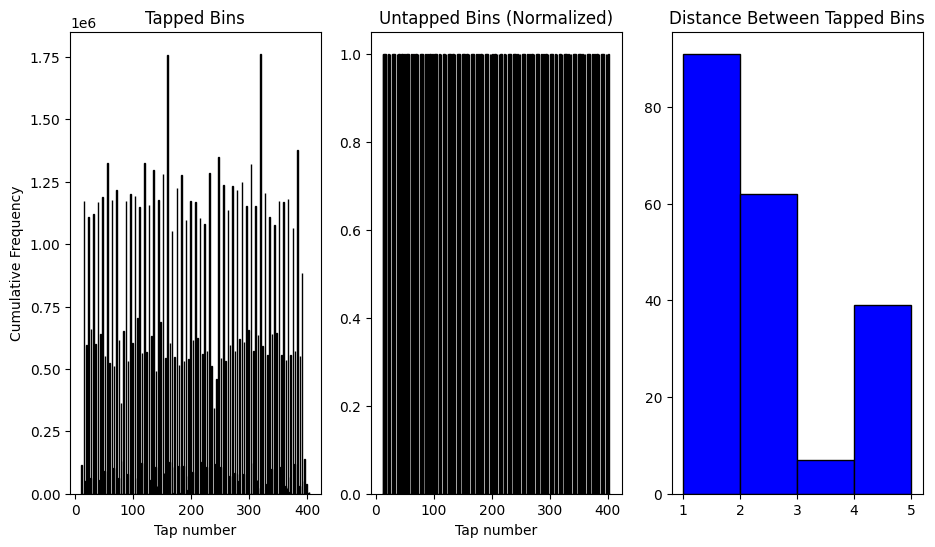

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL3_Z3_2.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL3_Z3_2.perform_POR()
to_print1 = TDL3_Z3_2.get_logical_assignments()
error_lib1 = TDL3_Z3_2.build_initial_error_lib()


Present taps: 
 [ 11  15  18  19  23  25  26  27  31  33  34  35  37  39  41  42  43  47
  50  51  55  57  58  59  63  65  66  67  71  73  74  75  79  82  83  87
  90  91  95  98  99 103 105 106 107 111 113 114 115 119 121 122 123 127
 130 131 135 137 138 139 141 143 145 146 147 151 153 154 155 159 161 162
 163 167 169 170 171 175 177 178 179 181 183 185 186 187 191 193 194 195
 197 199 201 202 203 207 209 210 211 213 215 217 218 219 223 225 226 227
 231 233 234 235 239 241 242 243 245 247 249 250 251 255 257 258 259 263
 265 266 267 271 273 274 275 279 281 282 283 287 290 291 295 297 298 299
 303 305 306 307 311 313 314 315 319 321 322 323 327 329 330 331 333 335
 337 338 339 343 345 346 347 351 353 354 355 357 359 361 362 363 365 367
 369 370 371 375 377 378 379 383 385 386 387 391 393 394 395 397 399 401
 402 403] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL3_Z3_2.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL3_Z3_2.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(4), np.int64(8)),):[8, 4, 6, 7, np.int64(5)]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]

Logical bin assignment: 

{0: np.int64(6408), 1: np.int64(6409), 2: np.int64(6410), 3: np.int64(6411), 4: np.int64(6412), 5: np.int64(6413), 6: np.int64(6414), 7: np.int64(6415), 8: np.int64(6432), 9: np.int64(6433), 10: np.int64(6434), 11: np.int64(6435), 12: np.int64(6436), 13: np.int64(6437), 14: np.int64(6438), 15: np.int64(6439), 16: np.int64(6456), 17: np.int64(6457), 18: np.int64(6458), 19: np.int64(6459), 20: np.int64(6460), 21: np.int64(6461), 22: np.int64(6462), 23: np.int64(6463), 24: np.int64(6480), 25: np.int64(6481), 26: np.int64(6482), 27: np.int64(6483), 2

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR2.csv'.

There are 366 tapped bins and 27 untapped = 393 = 393

Tapped is: 93.13% 



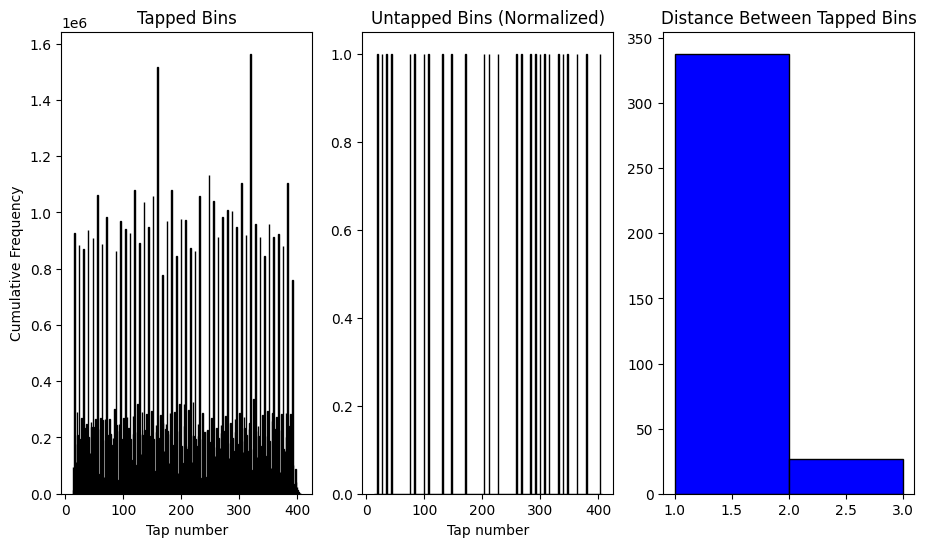

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL3_Z3_2.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL3_Z3_2.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL3_Z3_2.get_logical_assignments()

Present taps: 
 [ 13  14  15  16  17  18  20  21  22  23  24  25  26  28  29  30  31  32
  33  34  36  37  38  39  40  41  42  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  76  77  78  79  80  81  82  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98 100 101 102 103 104 105 106 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 204
 205 206 207 208 209 210 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 260 261
 262 263 264 265 266 268 269 270 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL3_Z3_2.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL3_Z3_2.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.i

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR3.csv'.

There are 392 tapped bins and 1 untapped = 393 = 393

Tapped is: 99.75% 



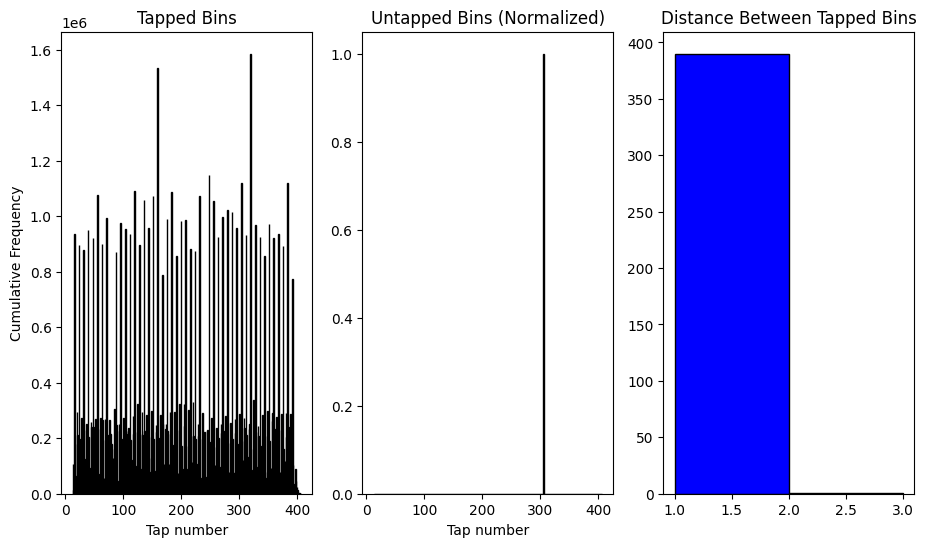

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_2_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL2_Z3_2.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL2_Z3_2.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL2_Z3_2.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 25

KeyError: ((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(8)))

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [11]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL3_Z3_2.npz", cdc_to_pass = cdc_to_pass)

In [12]:
print(cdc_to_pass)

{np.int64(6438): np.float64(4.931669543678491), np.int64(6436): np.float64(0.5936298362893075), np.int64(6457): np.float64(42.56471867204865), np.int64(6458): np.float64(8.113592753633286), np.int64(6456): np.float64(1.9632475752963834), np.int64(6459): np.float64(2.367290491364628), np.int64(6463): np.float64(2.9036350711842625), np.int64(6461): np.float64(13.376971210964744), np.int64(6462): np.float64(9.628242213385011), np.int64(6460): np.float64(0.9111538292926409), np.int64(6481): np.float64(40.75364074231099), np.int64(6480): np.float64(8.991148325361571), np.int64(6482): np.float64(0.006137706050322165), np.int64(6483): np.float64(2.911227640890957), np.int64(6487): np.float64(5.180542157896739), np.int64(6485): np.float64(12.32074019643819), np.int64(6486): np.float64(8.87148578962492), np.int64(6484): np.float64(3.282581589180079), np.int64(6505): np.float64(39.909137854275926), np.int64(6504): np.float64(10.400547492472587), np.int64(6506): np.float64(0.014457707585203323), 

In [13]:
print(to_print2)

{0: np.int64(6408), 1: np.int64(6409), 2: np.int64(6410), 3: np.int64(6411), 4: np.int64(6412), 5: np.int64(6413), 6: np.int64(6414), 7: np.int64(6415), 8: np.int64(6432), 9: np.int64(6433), 10: np.int64(6434), 11: np.int64(6435), 12: np.int64(6437), 13: np.int64(6439), 14: np.int64(6438), 15: np.int64(6436), 16: np.int64(6457), 17: np.int64(6458), 18: np.int64(6456), 19: np.int64(6459), 20: np.int64(6463), 21: np.int64(6461), 22: np.int64(6462), 23: np.int64(6460), 24: np.int64(6481), 25: np.int64(6480), 26: np.int64(6482), 27: np.int64(6483), 28: np.int64(6487), 29: np.int64(6485), 30: np.int64(6486), 31: np.int64(6484), 32: np.int64(6505), 33: np.int64(6504), 34: np.int64(6506), 35: np.int64(6507), 36: np.int64(6511), 37: np.int64(6509), 38: np.int64(6508), 39: np.int64(6510), 40: np.int64(6529), 41: np.int64(6528), 42: np.int64(6530), 43: np.int64(6531), 44: np.int64(6535), 45: np.int64(6533), 46: np.int64(6534), 47: np.int64(6532), 48: np.int64(6553), 49: np.int64(6554), 50: np.in

In [14]:
print(bin3)
print(present_taps3)
print(freq3)

[ 13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 2)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_24_POR3
The text file has been created in this directory under the name: Bin_sequence_25_04_24_POR3.txt.


In [ ]:
files.download("Bin_sequence_25_04_24_POR3.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print3

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL3_Z3_2.logical_assignment, TDL_start = TDL3_Z3_2.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 5, Ending Cell num: 152
5:[np.int64(4), np.int64(8)]
8:[np.int64(3), np.int64(4), np.int64(8)]
11:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
14:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
17:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
20:[np.int64(3), np.int64(4), np.int64(8)]
23:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
26:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
29:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
32:[np.int64(3), np.int64(4), np.int64(8)]
35:[np.int64(3), np.int64(4), np.int64(8)]
38:[np.int64(3), np.int64(4), np.int64(8)]
41:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
44:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
47:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
50:[np.int64(3), np.int64(4), np.int64(8)]
53:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
56:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
59:[np.int64(2), np.int64(3),

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL3_Z3_2.logical_assignment, TDL_start = TDL3_Z3_2.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 5. Ending Cell num 152
5:[np.int64(6), np.int64(7), np.int64(8)]
8:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
11:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
14:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
17:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
20:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
23:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
26:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
29:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
32:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
35:[np.int64(1), np.int

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL3_Z3_2.logical_assignment, TDL_start = TDL3_Z3_2.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 5, Ending Cell num: 152
5:[np.int64(6), np.int64(7), np.int64(8)]
8:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
11:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
14:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
17:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
20:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
23:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
26:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
29:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
32:[np.int64(1), np.int64(2), np.int64(3), np.int64(

In [ ]:
for i,j in TDL2_Z3_1.POR_result.items():
  print(f"{i}:{j}")

(np.int64(2), np.int64(3), np.int64(4), np.int64(8)):[2, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

0.0058588900736735346
1.846920597498587
0.0
10.07781066696695
10.042326582730427
1.2302251681309502
47.840388903673265
8.220826008293423
0.5044315356978923
4.9226961388367005
0.9643071573677674
11.406077745604938
10.806297498869359
1.1933708596030037
43.47598828992145
6.159630681084277
3.0314086237640856
3.326999077803615
1.53011529149874
13.866906074774816
9.414244117009925
0.0684639654576851
43.758018248387245
9.621100735901399
0.7119968912918266
3.66431049906132
1.611431015827709
11.602775805094478
10.585266145928674
2.036484040850024
42.85801713448939
9.234130496357961
1.4990726239309695
2.2284099398763297
0.10026261884141323
13.894452307943782
10.89096791025664
0.9916643940827432
43.0337838366996
9.964649040140756
0.7713890269580171
4.2753832839227695
1.638599256088695
13.625557603030265
9.414669359031402
3.2853726088124344
43.64126568893525
10.715059460705943
1.9451515044596135
3.991888602938566
1.801608697654612
10.53848952356628
10.436147943730983
0.8676354711521541
48.54784988

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>